In [89]:
library(ggplot2)
library(dplyr)
library(scales)

In [90]:
# create a data frame
group = c("A", "A", "B", "B","C", "C", "D", "D")
year = c("2021", "2022", "2021", "2022", "2021", "2022", "2021", "2022")

df <- data.frame(group, year)

# define replicates of each row
duptimes <- c(34458, 39105, 17322, 27486, 13253, 18145, 4256, 8569)

# create index of rows with duplications
idx <- rep(1:nrow(df), duptimes)

# use index to generate data frame
df <- df[idx,]

# display data frame
head(df)

,group,year
,<chr>,<chr>
1,A,2021
1.1,A,2021
1.2,A,2021
1.3,A,2021
1.4,A,2021
1.5,A,2021


In [91]:
# display grouped data frame

grouped <- df |> group_by(group, year) |> summarize(n = n())
grouped

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.


group,year,n
<chr>,<chr>,<int>
A,2021,34458
A,2022,39105
B,2021,17322
B,2022,27486
C,2021,13253
C,2022,18145
D,2021,4256
D,2022,8569


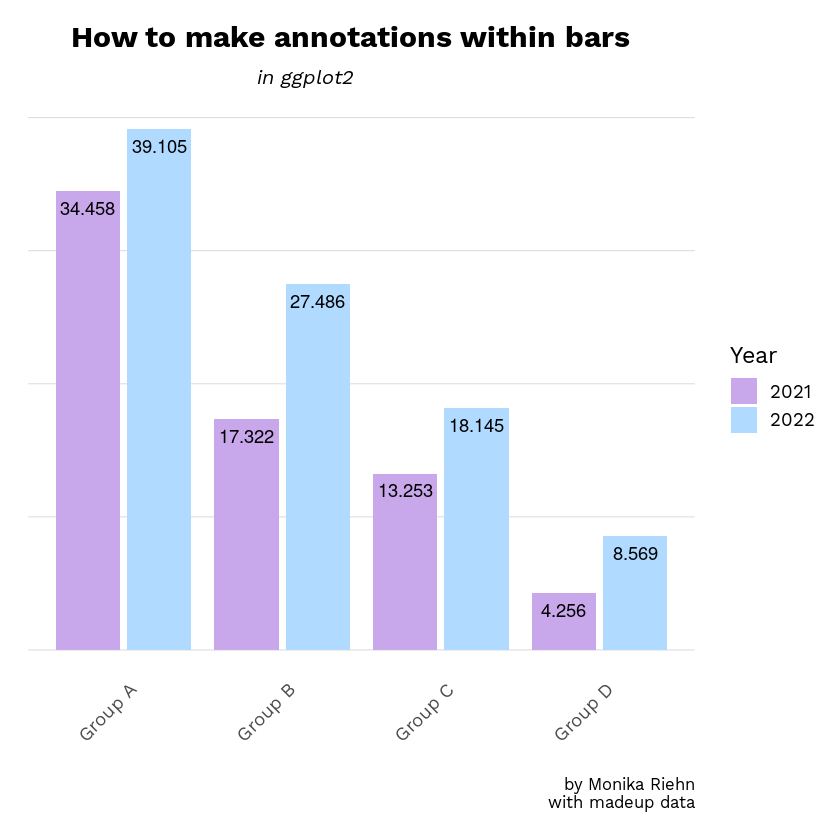

In [92]:
# data layer
ggplot(df, aes(x = group, fill = year)) +

# barplot
geom_bar(position = position_dodge2(preserve = "single", width = 1)) +

# text in bars
geom_text(aes(label = comma(after_stat(count),
                            big.mark = ".",
                            decimal.mark = ",")), 
          stat = "count", 
          vjust = 1.7,
          hjust = .5,
          colour = "black",
          position = position_dodge(width = .9)) +

# set general theme and font family
theme_light(base_size = 14, 
            base_family = "Work Sans") +

# fill bars with specific colors
scale_fill_manual(values = c("#C9A7EB","#B0DAFF")) +

# set plot title and legend title
labs(title = "How to make annotations within bars",
     subtitle = "in ggplot2",
     caption = "by Monika Riehn\nwith madeup data",
     fill = "Year",
     x = element_blank(), 
     y = element_blank()) +

# change the default x labels in order to insert line break
scale_x_discrete(labels = c("Group A",
                            "Group B",
                            "Group C",
                            "Group D")) +

# specify further theme elements
theme(panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.y = element_blank(),
      axis.ticks = element_blank(),
      plot.title = element_text(face = 'bold',
                                size = 18,
                                margin = margin(10,0,10,0),
                                hjust = .4),
      plot.subtitle = element_text(face = 'italic',
                                   size = 12,
                                   margin = margin(0,0,10,0),
                                   hjust = .4),
      plot.caption = element_text(size = 10, 
                                  margin = margin(10,0,10,0)),
      axis.text.x = element_text(angle = 45, 
                                 vjust = 1, 
                                 hjust = .9),axis.line.y = element_blank(), axis.text.y = element_blank())

In [93]:
# export image

ggsave(("barplot_annotate_in_bars.png"), 
device = "png", units = "cm", width = 20, height = 19)

ggsave(("barplot_annotate_in_bars.jpg"), 
device = "jpg", units = "cm", width = 20, height = 19)

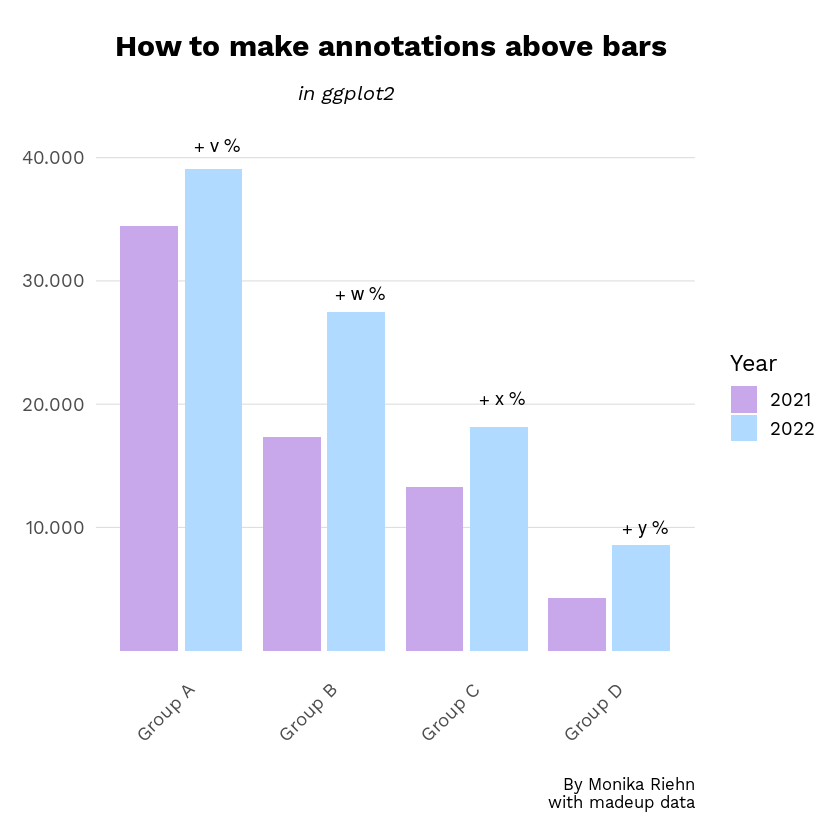

In [94]:
# data layer
ggplot(df, aes(x = group, fill = year)) +

# barplot
geom_bar(position = position_dodge2(preserve = "single", width = 1)) +

# annotations above bars
annotate("text", x = 1.25, y = 41000, label = "+ v %") +
annotate("text", x = 2.25, y = 29000, label = "+ w %") +
annotate("text", x = 3.25, y = 20500, label = "+ x %") +
annotate("text", x = 4.25, y = 10000, label = "+ y %") +

# set general theme and font family
theme_light(base_size = 14, 
            base_family = "Work Sans") +

# fill bars with specific colors
scale_fill_manual(values = c("#C9A7EB","#B0DAFF")) +

# set plot title and legend title
labs(title = "How to make annotations above bars",
     subtitle = "in ggplot2",
     caption = "By Monika Riehn\nwith madeup data",
     fill = "Year",
     x = element_blank(), 
     y = element_blank()) +

# change the default x labels in order to insert line break
scale_x_discrete(labels = c("Group A",
                            "Group B",
                            "Group C",
                            "Group D")) +

# format numbers of y-label with big.mark "."
scale_y_continuous(labels = label_number(big.mark = ".",
                                         decimal.mark = ","),
                   breaks = c(10000,20000,30000,40000)) +

# specify further theme elements
theme(panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.y = element_blank(),
      axis.ticks = element_blank(),
      plot.title = element_text(face = 'bold',
                                size = 18,
                                margin = margin(15,0,15,0),
                                hjust = .4),
      plot.subtitle = element_text(face = 'italic',
                                   size = 12,
                                   margin = margin(0,0,10,0),
                                   hjust = .4),
      plot.caption = element_text(size = 10, 
                                  margin = margin(10,0,10,0)),
      axis.text.x = element_text(angle = 45, 
                                 vjust = 1, 
                                 hjust = .9))

In [95]:
# export image

ggsave(("barplot_annotate_above_bars.png"), 
device = "png", units = "cm", width = 20, height = 19)

ggsave(("barplot_annotate_above_bars.jpg"), 
device = "jpg", units = "cm", width = 20, height = 19)